# Sesión 05: Análisis de correlación

Un medida útil para evaluar el grado de relación lineal entre dos variables cuantitativas es el coeficiente de correlación de Pearson. Este coeficiente puede tomar valores entre -1 y 1, donde valores positivos indican una relación directa, valores negativos indican una relación inversa, y cuanto más cercano sea a 0 más débil es esta relación. 

Para calcular un coeficiente de correlación de Pearson entre dos columnas se puede utilizar el método *corr()* de Pandas. Por ejemplo:
`correlacion = df['X'].corr(df['Y'])`  

Para calcular el coeficiente de correlación de Spearman se puede agregar como argumento:  
`correlacion = df['X'].corr(df['Y'], method='spearman')`  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://github.com/adan-rs/AnalisisDatos/raw/main/datasets/enigh2020.xlsx')

HTTPError: HTTP Error 404: Not Found

In [5]:
# Para filtrar valores atípicos
df = df[(df['ing_cor']<140000) & (df['gasto_mon']<70000)]

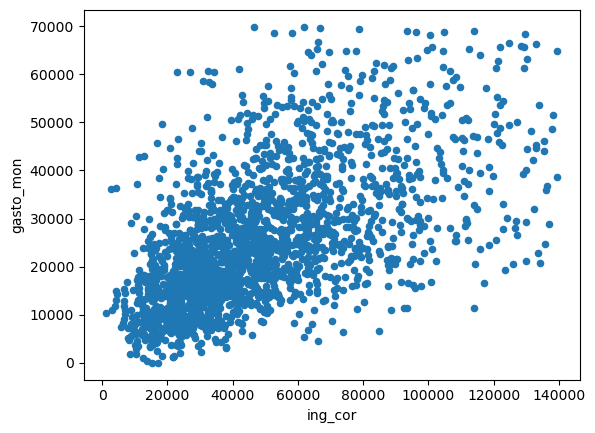

In [6]:
df.plot(kind='scatter', x='ing_cor', y='gasto_mon');

In [9]:
# Calcula la correlación entre "ing_cor" y "gasto_mon"
correlacion = df['ing_cor'].corr(df['gasto_mon'])
correlacion.round(4)

0.5856

Si se tiene un DataFrame *df* de variables cuantitativas se puede obtener la matriz de correlaciones utilizando `df.corr()`

In [10]:
var_cont = ["ing_cor", "gasto_mon", "edad_jefe", "tot_integ"]
matriz_corr = df[var_cont].corr()
matriz_corr

,ing_cor,gasto_mon,edad_jefe,tot_integ
ing_cor,1.000000,0.585624,0.002198,0.314226
gasto_mon,0.585624,1.000000,-0.174677,0.328519
edad_jefe,0.002198,-0.174677,1.000000,-0.180985
tot_integ,0.314226,0.328519,-0.180985,1.000000


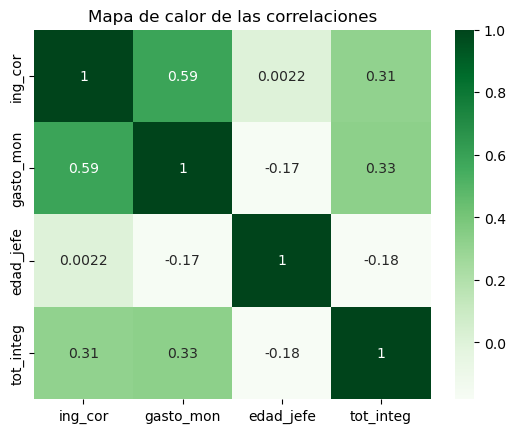

In [11]:
ax = sns.heatmap(matriz_corr, annot=True, cmap='Greens')
ax.set_title('Mapa de calor de las correlaciones');

## Prueba de hipótesis para la correlación

*¿Para qué se utiliza?* Se utiliza para evaluar si existe una relación o no entre dos variables cuantitativas. Esta prueba evalúa si el coeficiente de correlación de Pearson (r) entre las dos variables es significativamente diferente de cero.

*Variables*. Se consideran dos variables cuantitativas con escala de medición de razón o de intervalo.

*Hipótesis*. Las hipótesis son:
- Hipótesis nula (H0):  No existe una correlación entre las dos variables (r = 0).
- Hipótesis alternativa (H1): Existe una correlación entre las dos variables (r ≠ 0).

*Supuestos principales* 
- La relación entre ambas variables debe ser lineal.
- La distribución de los datos debe ser normal (o una muestra grande)

*Procedimiento*. Se recomienda utilizar la biblioteca *scipy.stats* debido a que permite obtener el valor p. Para ello se puede usar:  
`corr_coef, p_valor = pearsonr(df['X'], df['Y'])`

In [12]:
from scipy.stats import pearsonr

In [13]:
corr_coef, p_valor = pearsonr(df['ing_cor'], df['gasto_mon'])

In [14]:
print('Coeficiente de correlación: ', corr_coef) 
print('Valor p', p_valor)

Coeficiente de correlación:  0.5856240799837185
Valor p 1.3621482357884593e-192


Ejemplo de reporte de metodología y resultados:
> “Se realizó una prueba de correlación de Pearson para evaluar la relación entre el ingreso corriente y el gasto monetario. Se encontró una correlación positiva significativa entre ambas variables (r = 0.6184. p < 0.001)”

## Comentarios adicionales
El coeficiente de correlación de Spearman es una alternativa apropiada cuando las variables son ordinales, existen relaciones monótonas no lineales, o la distribución no es normal.  
`from scipy.stats import spearmanr`  
`corr_coef, p_value = spearmanr(x, y)`

## Lecturas recomendadas

El caso del "datasaurio" ilustra bien la importancia de graficar las variables
https://www.scientificamerican.com/article/what-this-graph-of-a-dinosaur-can-teach-us-about-doing-better-science/ 

Para una discusión de cómo tomar decisiones a partir de correlaciones es recomendable la siguiente lectura: 
https://hbr.org/2014/03/when-to-act-on-a-correlation-and-when-not-to

## Práctica

Utilizando el mismo dataframe del ejemplo, realiza una prueba de hipótesis para la correlación para evaluar si existe una relación significativa entre el ingreso y alguna de las variables de gasto.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2089 entries, 0 to 2331
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    2089 non-null   int64  
 1   ubica_geo   2089 non-null   object 
 2   clave_mun   2089 non-null   int64  
 3   tam_loc     2089 non-null   int64  
 4   est_socio   2089 non-null   object 
 5   clase_hog   2089 non-null   object 
 6   sexo_jefe   2089 non-null   object 
 7   edad_jefe   2089 non-null   int64  
 8   educa_jefe  2089 non-null   int64  
 9   tot_integ   2089 non-null   int64  
 10  hombres     2089 non-null   int64  
 11  mujeres     2089 non-null   int64  
 12  p65mas      2089 non-null   int64  
 13  ing_cor     2089 non-null   float64
 14  gasto_mon   2089 non-null   float64
 15  alimentos   2089 non-null   float64
 16  cereales    2089 non-null   float64
 17  carnes      2089 non-null   float64
 18  leche       2089 non-null   float64
 19  huevo       2089 non-null   floa